## Import necessary libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Loading Data

In [2]:
df = pd.read_csv('train.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Checking DTypes of columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

### User_ID and product_ID has more unq values there is no use of them

In [6]:
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)

In [7]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Check Descriptive Stats

In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,NaN,NaN,NaN,12.668243,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,NaN,NaN,NaN,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [9]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
for i in df.columns:
    print('Precentage of missing values is {} % in {} '.format(round(
        (df[i].isnull().sum()/df.shape[0])*100,2),i))

Precentage of missing values is 0.0 % in Gender 
Precentage of missing values is 0.0 % in Age 
Precentage of missing values is 0.0 % in Occupation 
Precentage of missing values is 0.0 % in City_Category 
Precentage of missing values is 0.0 % in Stay_In_Current_City_Years 
Precentage of missing values is 0.0 % in Marital_Status 
Precentage of missing values is 0.0 % in Product_Category_1 
Precentage of missing values is 31.57 % in Product_Category_2 
Precentage of missing values is 69.67 % in Product_Category_3 
Precentage of missing values is 0.0 % in Purchase 


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [41]:
df[df['Age'] == '55+']

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Pro_1,Pro_2,Pro_3,Purchase


### Replace age with some catagories

In [18]:
df['Age'].replace(['0-17','18-25','26-35','36-45','46-50','51-55','55+'],[1,2,3,4,5,6,7],inplace=True)

In [21]:
df['Age'].astype('int')

0         1
1         1
2         1
3         1
4         6
         ..
550063    6
550064    3
550065    3
550066    6
550067    5
Name: Age, Length: 550068, dtype: int64

In [25]:
df['Gender'] = df['Gender'].map({'M':0,'F':1})

In [26]:
df['Gender'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 550068 entries, 0 to 550067
Series name: Gender
Non-Null Count   Dtype
--------------   -----
550068 non-null  int64
dtypes: int64(1)
memory usage: 4.2 MB


In [27]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,A,2,0,3,NaN,NaN,8370
1,1,1,10,A,2,0,1,6.0,14.0,15200
2,1,1,10,A,2,0,12,NaN,NaN,1422
3,1,1,10,A,2,0,12,14.0,NaN,1057
4,0,6,16,C,4+,0,8,NaN,NaN,7969


In [35]:
df.rename(columns={"Product_Category_1":"Pro_1",
                   "Product_Category_2": "Pro_2",
                   "Product_Category_3": "Pro_3",
                   "City_Category":"City", 
                   "Stay_In_Current_City_Years":"Years_in_City"},inplace = True)

In [36]:
df.head()

,Gender,Age,Occupation,City,Years_in_City,Marital_Status,Pro_1,Pro_2,Pro_3,Purchase
0,1,1,10,A,2,0,3,9.0,14.0,8370
1,1,1,10,A,2,0,1,6.0,14.0,15200
2,1,1,10,A,2,0,12,9.0,14.0,1422
3,1,1,10,A,2,0,12,14.0,14.0,1057
4,0,6,16,C,4+,0,8,9.0,14.0,7969


In [30]:
df['Pro_2'].replace(np.nan,df['Pro_2'].median(),inplace=True)
df['Pro_3'].replace(np.nan,df['Pro_3'].median(),inplace=True)

In [32]:
df.isnull().sum()

Gender            0
Age               0
Occupation        0
City              0
Years_in_City     0
Marital_Status    0
Pro_1             0
Pro_2             0
Pro_3             0
Purchase          0
dtype: int64

In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,550068.0,0.246895,0.431205,0.0,0.0,0.0,0.0,1.0
Age,550068.0,3.457336,1.263309,1.0,3.0,3.0,4.0,6.0
Occupation,550068.0,8.076707,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,0.409653,0.491770,0.0,0.0,0.0,1.0,1.0
Pro_1,550068.0,5.404270,3.936211,1.0,1.0,5.0,8.0,20.0
Pro_2,550068.0,9.576434,4.226025,2.0,8.0,9.0,14.0,18.0
Pro_3,550068.0,13.596114,2.352863,3.0,14.0,14.0,14.0,18.0
Purchase,550068.0,9263.968713,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Univariate Analysis

<Figure size 1152x1440 with 0 Axes>

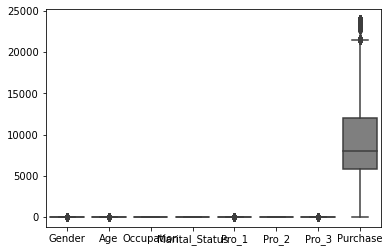

<Figure size 1152x1440 with 0 Axes>

In [58]:
sns.boxplot(data=df)
plt.figure(figsize=(16,20))

In [62]:
def uni(col):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=col,kde=True,bins=20)
    plt.title('Histogram of {}'.format(col))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=col)
    plt.title('Boxplot of {}'.format(col))
    plt.show()

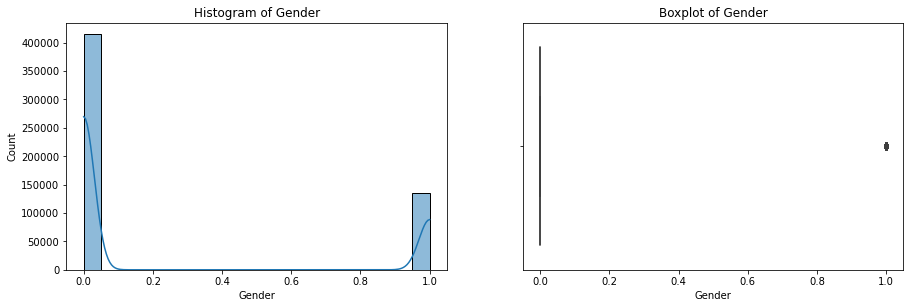

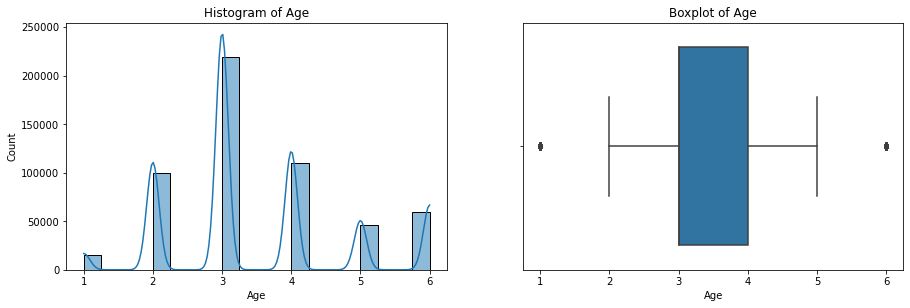

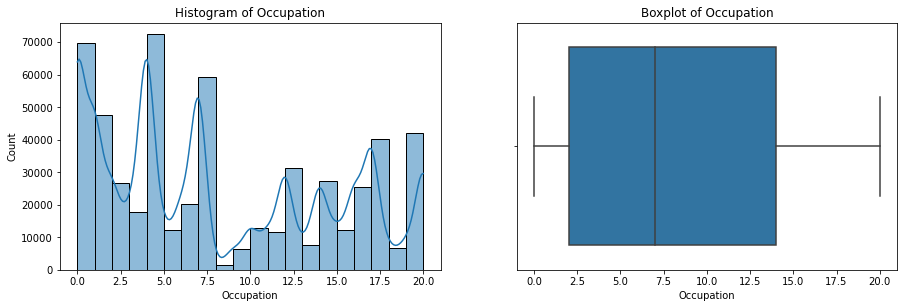

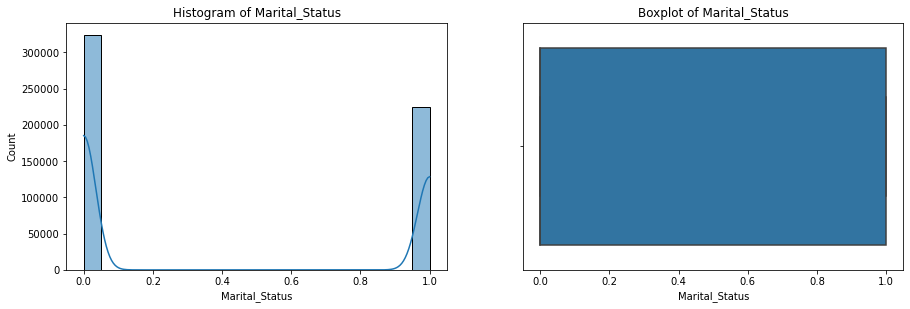

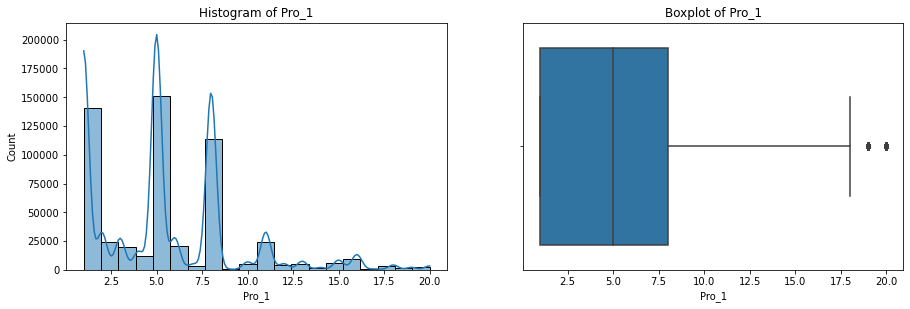

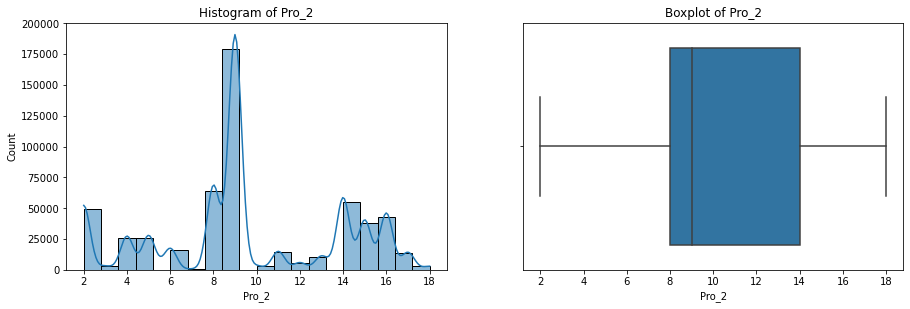

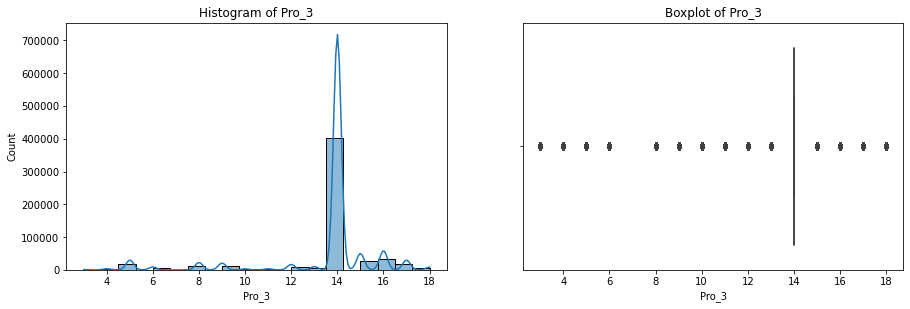

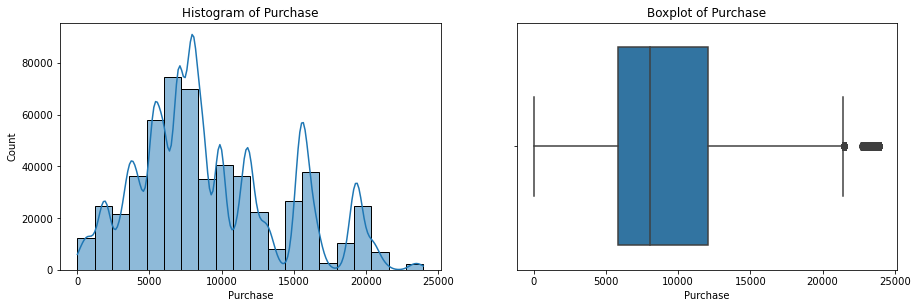

In [63]:
for col in df.select_dtypes(exclude='object'):
    uni(col)

<AxesSubplot:>

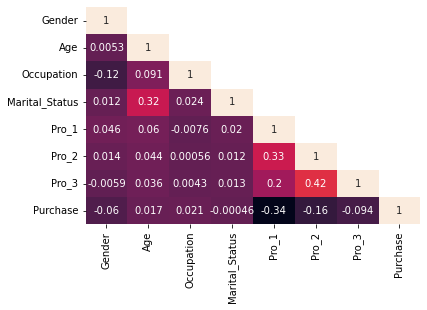

In [64]:
sns.heatmap(df.corr(),annot=True,cbar=False,mask=np.triu(df.corr(),+1))

### BiVariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

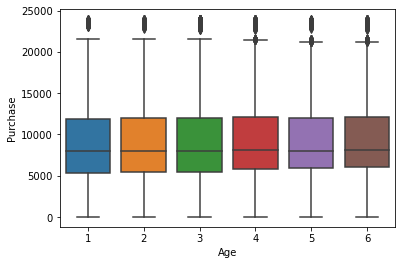

In [65]:
sns.boxplot(data=df,y='Purchase',x='Age')

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

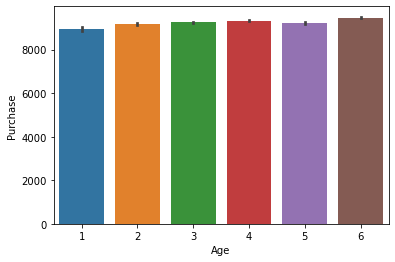

In [66]:
sns.barplot(data=df,y='Purchase',x='Age')

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

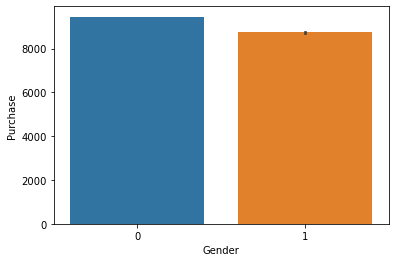

In [69]:
sns.barplot(data=df,y='Purchase',x='Gender')

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

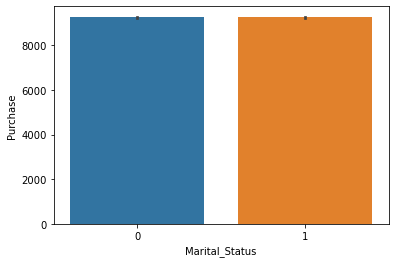

In [71]:
sns.barplot(data=df,y='Purchase',x='Marital_Status')